In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
%matplotlib inline

In [3]:
collisions = pd.read_csv("./data/NYPD Motor Vehicle Collisions.csv", index_col=0)
collisions = gpd.GeoDataFrame(collisions, geometry=collisions.apply(lambda srs: Point(srs['LONGITUDE'], srs['LATITUDE']), axis='columns'))

In [4]:
from geoplot import geoplot as gplt

In [5]:
cc = collisions.head(1000)[collisions.head(1000).apply(lambda srs: pd.notnull(srs['geometry'].x) and pd.notnull(srs['geometry'].y), axis='columns')]

In [6]:
cc.geometry.head(1)

DATE
08/25/2015    POINT (-73.9203819 40.7329414)
Name: geometry, dtype: object

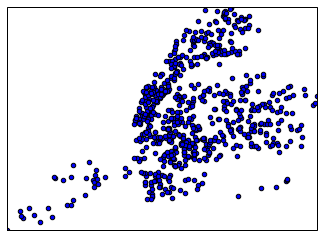

In [8]:
gplt.pointplot(cc, projection=ccrs.PlateCarree())

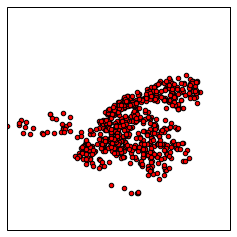

In [9]:
gplt.pointplot(cc, projection=ccrs.AlbersEqualArea(), c='r')

In [12]:
cities = gpd.read_file("./data/citiesx010g.shp")

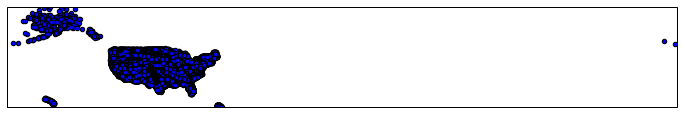

In [17]:
gplt.pointplot(cities, projection=ccrs.PlateCarree())

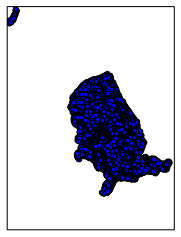

In [55]:
gplt.pointplot(cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HA', 'HW', 'VI'])],
               projection=ccrs.AlbersEqualArea())

In [ ]:
cities = gpd.read_file("./data/citiesx010g.shp")

In [67]:
cities_m = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

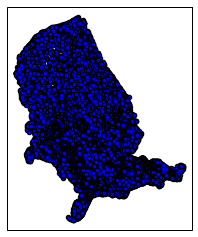

In [73]:
fig = plt.figure()
ax = plt.subplot(111, projection=ccrs.AlbersEqualArea())
ax.scatter([p.x for p in cities_m.geometry], [p.y for p in cities_m.geometry], transform=ccrs.PlateCarree())
plt.show()